# **Proyecto Final**

# **Data Science II : Machine Learning para la Ciencia de Datos**

# **Titulo: Predicción de precios de automóviles**

**Alumno: Ruben Ferreyra**

# **Presentación**

Durante este proyecto se analizará el dataset "Car Price", que se obtuvo del sitio web Kaggle (https://www.kaggle.com/datasets/sidharth178/car-prices-dataset/data), para poder predecir el precio de un automóvil. Este archivo contiene 18 variables y más de 19 mil filas con información.

Lo que motivó a utilizar estos datos es la gran posibilidad de llevar a cabo un analisis profundo, pero al mismo tiempo, necesitando transformar y seleccionar los datos que se utilizarán en preparación para realizar un buen modelado.

La audiencia del proyecto es muy amplia, ya que un modelo eficiente podría ser utilizado tanto por empresas como por individuos, para analizar los precios de los automóviles y saber su valor en el mercado. Si bien este proyecto en particular está enfocado en los datos que este archivo contienen, el concepto del modelo podría ser utilizado con otros dataset similares en cualquier país.

**Contexto Comercial y Analítico**

En los datos obtenidos gracias este dataset se puede observar información precisa sobre valor de venta y especificaciones técnicas de los vehículos, no solo por marca y modelos, sino por otras características que ayudan a entender el motivo de un valor mayor o menor.

El precio de los autos varía continuamente debido a lanzamientos de nuevos modelos o nueva tecnología, y comercialmente se requiere poder conocer y predecir los valores para no perder dinero en las operaciones. Se necesita analizar cuales son las variables que más influyen en los precios, saber su relación con otras variables, y, de una manera análita, tener las bases necesarias para poder realizar una predicción del precio de un vehículo aún cuando no se tengan todos los datos de ventas anteriores.

**Preguntas a resolver mediante el Análisis de Datos**

Una de las hipótesis a anailizar es si las marcas de los vehículos, por la confianza y conocimiento que se tiene sobre ellas, produce una variación en el precio aun en vehículos de similares características. Al mismo tiempo, si el año de fabricación, el kilometraje recorrido y el tipo de combustible utilizado actualmente son vistos como algunos de los determinantes en el precio.

Por medio de este modelo nos gustaría saber: ¿Son estas variables algunas de las más importantes? ¿Podemos predecir el valor de un vehículo sin incluir alguna de ellas? ¿Cuántas variables se requieren para poder tener un buen porcentaje de predicción en nuestro modelo? ¿Cuáles son otras variables necesarias? Por último, ¿puede un modelo predecir el precio de un vehículo con la información que este archivo provee o se requiere más información?

**Objetivo**

El objetivo de este proyecto es poder predecir el precio (variable objetivo) de los vehículos a través de una cantidad acotada de variables, habiendo encontrado primero las de mayor relevancia para la predicción. Se utilizará un modelo de regresión, con el que podremos obtener un precio para cada automóvil, y también tener métricas que nos indicarán cuan preciso el modelo resultó.

# **Lectura de datos**

In [113]:
#Se importan las librerías necesarias para el análisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
from scipy.stats import norm
from scipy import stats
import statistics

In [114]:
#Cargamos el dataset "Car Price"
file_path = "https://raw.githubusercontent.com/ferreyraru/Coderhouse-Data2-TF-Car/refs/heads/main/Car%20price.csv"
df_Car = pd.read_csv(file_path)

**Análisis inicial del dataset**

In [115]:
df_Car.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.00,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.00,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.00,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.00,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.00,Automatic,Front,04-May,Left wheel,Silver,4


In [116]:
df_Car.shape

(19237, 18)

In [117]:
df_Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Hay algunas variables que necesitaremos normalizar o transformar durante el análisis, ya que deberían ser numéricas pero han sido tomadas como variable objeto.  

**Descripción de variables**

ID: Identificador único de los automóviles. Tipo: Numérica (Int)

Price: Precio del vehículo  en dólares. Tipo: Numérica (Int)

Levy: Impuesto o tasa adicional aplicada al automóvil. Tipo: Object - a modificar

Manufacturer: Fabricante o marca. Tipo: Object

Model: Modelo específico. Tipo: Object

Prod. year: Año de producción. Tipo: Numérica (Int)

Category: Categoría. Tipo: Object

Leather interior: Indica si tiene interior de cuero. Tipo: Object

Fuel type: Tipo de combustible utilizado por el automóvil. Tipo: Object

Engine volume: Volumen del motor en litros. Tipo: Object - a modificar

Mileage: Kilometraje (en Kilómetros). Tipo: Object - a modificar

Cylinders: Número de cilindros en el motor. Tipo: Numérica (Float)

Gear box type: Tipo de caja de cambios o transmisión. Tipo: Object

Drive wheels: Tipo de tracción del automóvil (delantera, trasera o 4x4). Tipo: Object

Doors: Número de puertas. Tipo: Object - a modificar

Wheel: Posición del volante. Tipo: Object

Color: Color del automóvil. Tipo: Object

Airbags: Número de airbags. Tipo: Numérica (Int)

In [118]:
df_Car.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.00,45576535.89,936591.42,20746880.00,45698374.00,45772308.00,45802036.00,45816654.00
Price,19237.00,18555.93,190581.27,1.00,5331.00,13172.00,22075.00,26307500.00
Prod. year,19237.00,2010.91,5.67,1939.00,2009.00,2012.00,2015.00,2020.00
Cylinders,19237.00,4.58,1.20,1.00,4.00,4.00,4.00,16.00
Airbags,19237.00,6.58,4.32,0.00,4.00,6.00,12.00,16.00


In [119]:
df_Car.describe(include=['object']).T

,count,unique,top,freq
Levy,19237,559,-,5819
Manufacturer,19237,65,HYUNDAI,3769
Model,19237,1590,Prius,1083
Category,19237,11,Sedan,8736
Leather interior,19237,2,Yes,13954
Fuel type,19237,7,Petrol,10150
Engine volume,19237,107,2,3916
Mileage,19237,7687,0 km,721
Gear box type,19237,4,Automatic,13514
Drive wheels,19237,3,Front,12874


In [120]:
df_Car.select_dtypes(include=['object']).apply(pd.unique)

,0
Levy,"[1399, 1018, -, 862, 446, 891, 761, 751, 394, ..."
Manufacturer,"[LEXUS, CHEVROLET, HONDA, FORD, HYUNDAI, TOYOT..."
Model,"[RX 450, Equinox, FIT, Escape, Santa FE, Prius..."
Category,"[Jeep, Hatchback, Sedan, Microbus, Goods wagon..."
Leather interior,"[Yes, No]"
Fuel type,"[Hybrid, Petrol, Diesel, CNG, Plug-in Hybrid, ..."
Engine volume,"[3.5, 3, 1.3, 2.5, 2, 1.8, 2.4, 4, 1.6, 3.3, 2..."
Mileage,"[186005 km, 192000 km, 200000 km, 168966 km, 9..."
Gear box type,"[Automatic, Tiptronic, Variator, Manual]"
Drive wheels,"[4x4, Front, Rear]"


# **Data Wranglimg - Limpieza y transformación de datos**

**Eliminación de valores duplicados**

In [121]:
#Se calcula la cantidad de duplicados
df_Car.duplicated().sum()

np.int64(313)

In [122]:
#Hay 313 duplicados que debemos borrar
df_Car = df_Car.drop_duplicates()


Los duplicados fueron borrados

**Valores nulos**

In [123]:
#¿Hay datos nulos en el dataset?
df_Car.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


No hay valores nulos en ninguna de las variables

**Transformaciones y normalizaciones de variables**



In [124]:
#Convertir la variable Impuesto(Levy) en númerica, reemplazando valores no completos con 0
df_Car['Levy'] = df_Car['Levy'].replace('-', '0')
df_Car['Levy'] = df_Car['Levy'].astype(int)

<ipython-input-124-7920b2c9e129>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Car['Levy'] = df_Car['Levy'].replace('-', '0')
<ipython-input-124-7920b2c9e129>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Car['Levy'] = df_Car['Levy'].astype(int)


In [125]:
#Convertimos la variable Engine Volume en numérica, y creamos la columna que nos dira si tiene Turbo o no
df_Car["Turbo"] = (
    df_Car["Engine volume"]
    .str.split(" ")
    .str[1])

df_Car['Turbo'] = df_Car['Turbo'].fillna('No')
df_Car['Turbo'] = df_Car['Turbo'].replace('Turbo', 'Yes')

df_Car["Engine volume"] = (
    df_Car["Engine volume"]
    .str.split(" ")
    .str[0])

df_Car['Engine volume'] = df_Car['Engine volume'].astype('float64')


<ipython-input-125-276101c0ddc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Car["Turbo"] = (
<ipython-input-125-276101c0ddc7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Car['Turbo'] = df_Car['Turbo'].fillna('No')
<ipython-input-125-276101c0ddc7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [126]:
#Convertimos la columna de Miliage y Doors en Numerica
df_Car["Mileage"] = (
    df_Car["Mileage"]
    .str.split(" ")
    .str[0])

df_Car['Mileage'] = df_Car['Mileage'].astype(int)

df_Car['Doors'] = df_Car['Doors'].replace('>5', '5')
df_Car["Doors"] = (
    df_Car["Doors"]
    .str.split("-")
    .str[0])

df_Car['Doors'] = df_Car['Doors'].astype(int)

In [127]:
#Comprobamos los nuevos tipos asignados a las variables anteriores
df_Car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  int64  
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  int64  
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

Las variables numéricas fueron modificadas.

Se agregó la variable Turbo: Indica si el motor es Turbo. Tipo: Object

In [128]:
#Reemplazo de datos en la variable tipo de combustible, para unir los dos tipos de autos híbridos
df_Car['Fuel type'] = df_Car['Fuel type'].replace('Plug-in Hybrid', 'Hybrid')

In [129]:
#Veremos los datos importantes (promedio, media, moda, cuartiles) de las variables numéricas
pd.set_option('display.float_format', '{:.2f}'.format)
df_Car.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18924.00,45575381.03,937546.82,20746880.00,45695007.50,45771914.50,45801742.25,45816654.00
Price,18924.00,18587.44,192135.63,1.00,5331.00,13172.00,22063.00,26307500.00
Levy,18924.00,632.89,568.27,0.00,0.00,642.00,917.00,11714.00
Prod. year,18924.00,2010.91,5.67,1939.00,2009.00,2012.00,2015.00,2020.00
Engine volume,18924.00,2.31,0.88,0.00,1.80,2.00,2.50,20.00
Mileage,18924.00,1555372.72,48802205.32,0.00,70195.75,126400.00,189119.75,2147483647.00
Cylinders,18924.00,4.58,1.20,1.00,4.00,4.00,4.00,16.00
Doors,18924.00,3.93,0.40,2.00,4.00,4.00,4.00,5.00
Airbags,18924.00,6.57,4.32,0.00,4.00,6.00,12.00,16.00


**Tratamiento de valores outliers**

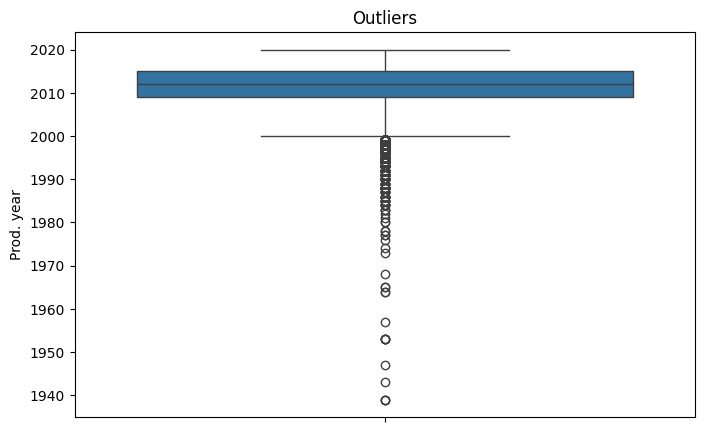

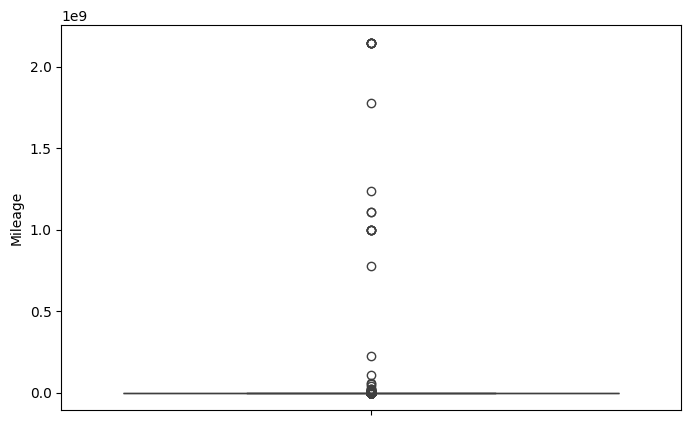

In [130]:
#Posibles outliers en variable Año y Millas

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_Car['Prod. year'])
plt.title("Outliers")
plt.ylabel("Prod. year")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_Car['Mileage'])
plt.ylabel("Mileage")
plt.show()

Hay muchos outliers que deben ser eliminados para poder trabajar correctamente con el resto de los datos

In [131]:
# Calcular el IQR de Año de producción
Q1 = df_Car['Prod. year'].quantile(0.25)
Q3 = df_Car['Prod. year'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers de año de producción
outliers_iqr = df_Car[(df_Car['Prod. year'] < lower_bound) | (df_Car['Prod. year'] > upper_bound)]


outliers_iqr.shape

(962, 19)

In [132]:
#Se eliminan outliers de variable año de producción
outliers = outliers_iqr.index
df_Car_sin_out_year = df_Car.drop(outliers)

In [133]:
#Se realiza el mismo análisis con kilómetros recorridos
Q1 = df_Car_sin_out_year['Mileage'].quantile(0.25)
Q3 = df_Car_sin_out_year['Mileage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df_Car_sin_out_year[(df_Car_sin_out_year['Mileage'] < lower_bound) | (df_Car_sin_out_year['Mileage'] > upper_bound)]

outliers_iqr.shape

(620, 19)

In [134]:
#Se eliminan outliers de variable Kilometraje
outliers = outliers_iqr.index
df_Car_sin_out_Mill = df_Car_sin_out_year.drop(outliers)

**Outliers en variable objetivo "Precio"**

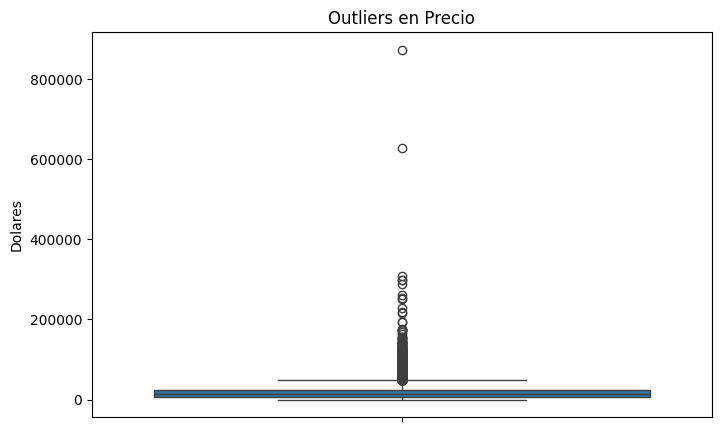

In [135]:
#Posibles outliers en variable Precio
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_Car_sin_out_Mill['Price'])
plt.title("Outliers en Precio")
plt.ylabel("Dolares")
plt.show()

In [136]:
# Calcular outliers en precio
Q1 = df_Car_sin_out_Mill['Price'].quantile(0.25)
Q3 = df_Car_sin_out_Mill['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df_Car_sin_out_Mill[(df_Car_sin_out_Mill['Price'] < lower_bound) | (df_Car_sin_out_Mill['Price'] > upper_bound)]


outliers_iqr.shape

(928, 19)

In [137]:
outliers = outliers_iqr.index
df_Car_sin_out= df_Car_sin_out_Mill.drop(outliers)

In [138]:
df_Car_sin_out.shape

(16414, 19)

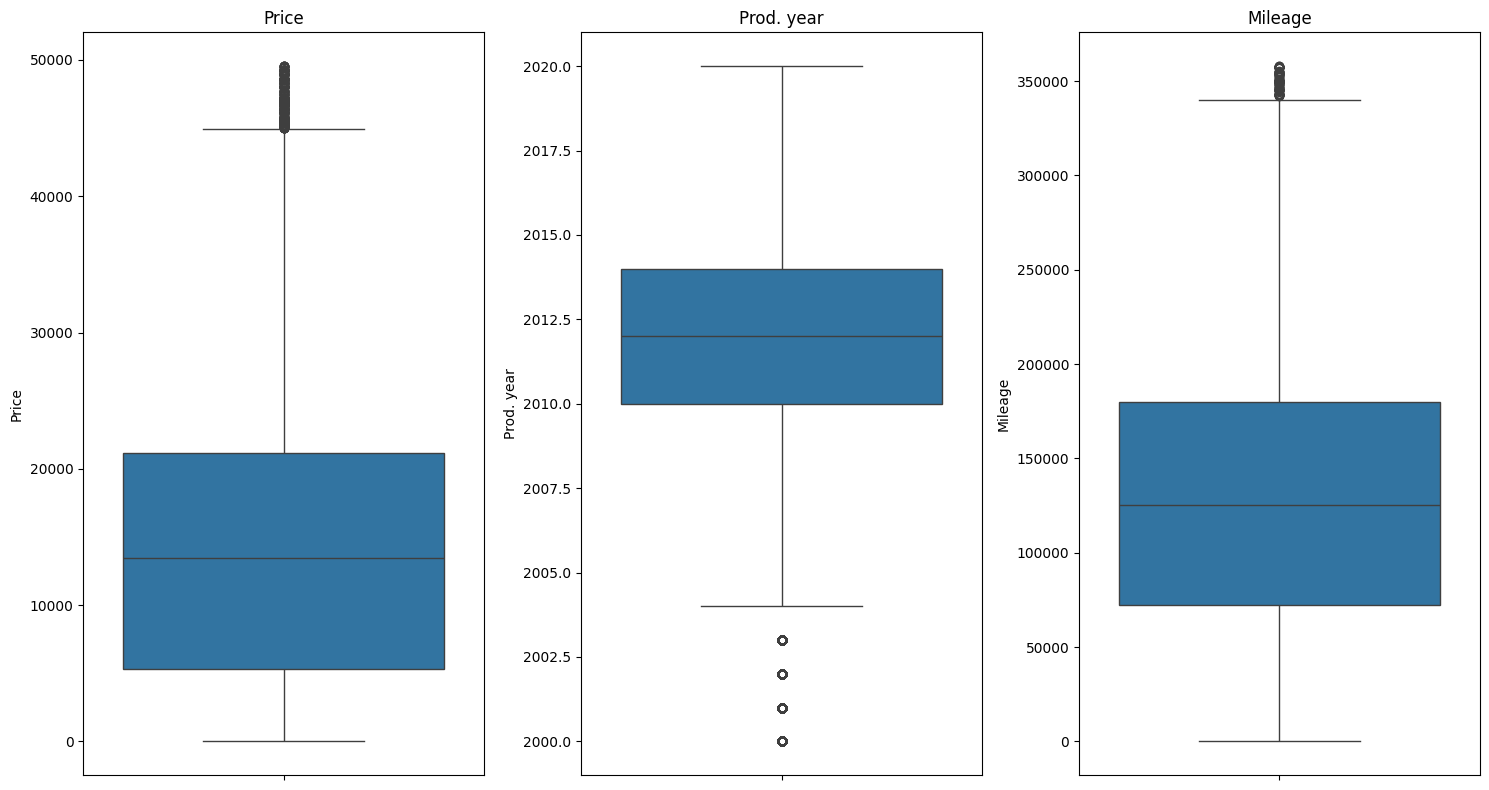

In [139]:
variables2 = ['Price', 'Prod. year', 'Mileage']

fig, axes = plt.subplots(1, len(variables2), figsize=(15,8))

for ax, variable in zip(axes, variables2):
    ax = sns.boxplot( y=variable, data=df_Car_sin_out, ax=ax)
    ax.set_title(variable)
plt.tight_layout()

Se quitaron los outliers encontrados en las variables precio, Kilometraje y año de producción.  Se guardan en un dataset adicional, manteniendo también el original con outliers para luego poder comparar los resultados del análisis con cada uno de ellos. Si bien los boxplot muestran que se podría considerar que algunos outliers aun están presentes, se decide mantenerlos para el análisis.

# **Análisis Exploratorio de datos**

**Análisis univariado**

Analisis de variables categóricas

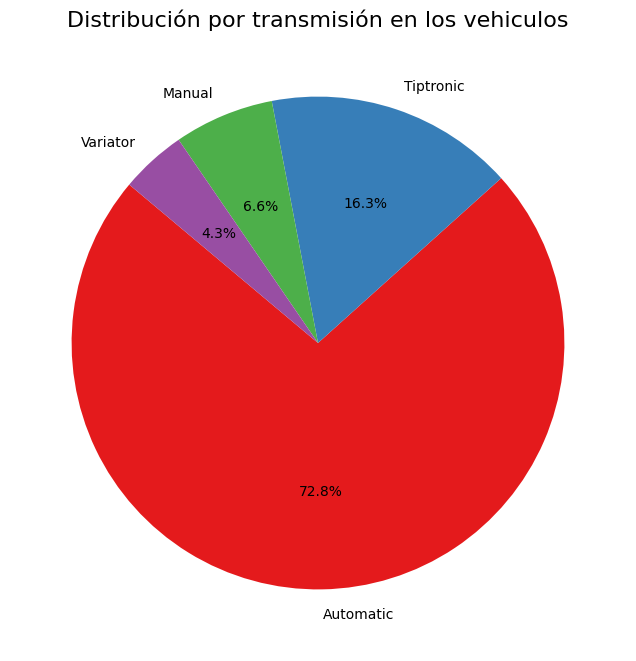

In [140]:
# Distribución de transmisiones
borough_counts = df_Car_sin_out['Gear box type'].value_counts()
borough_labels = borough_counts.index
borough_sizes = borough_counts.values

plt.figure(figsize=(8, 8))
plt.pie(borough_sizes, labels=borough_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set1"))
plt.title('Distribución por transmisión en los vehiculos', fontsize=16)
plt.show()


La distribución en transmisión es claramente fuerte para lo que son vehículos automáticos, transformandosé en los últimos años en la transmisión más utilizada

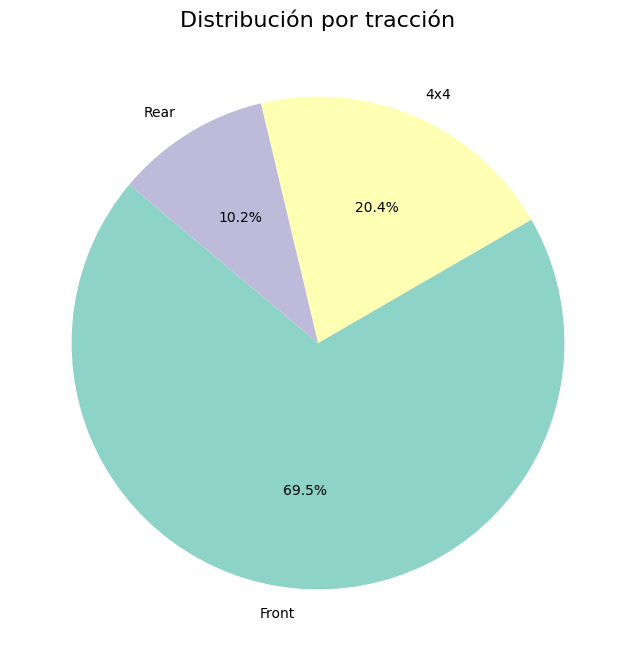

In [141]:
# Calcular la distribución de tracción
borough_counts = df_Car_sin_out['Drive wheels'].value_counts()
borough_labels = borough_counts.index
borough_sizes = borough_counts.values

plt.figure(figsize=(8, 8))
plt.pie(borough_sizes, labels=borough_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Distribución por tracción', fontsize=16)
plt.show()

De forma similar, la mayoría de los autos ofrecen tracción delantera

<ipython-input-142-90b969657d3a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_Car_sin_out, x='Fuel type', order=df_Car_sin_out['Fuel type'].value_counts().index, palette='Set1', width=0.6)  # Aumentar el ancho de las barras


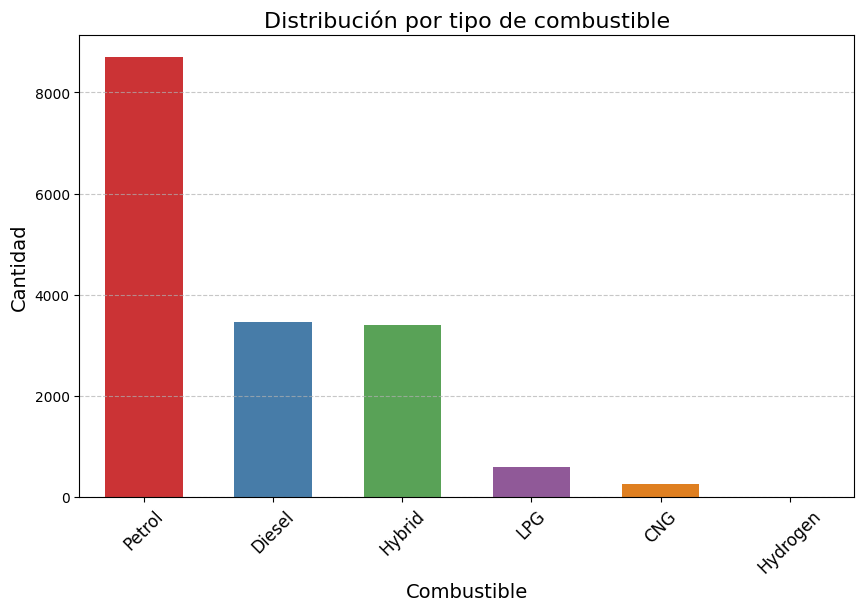

In [142]:
#Analizaremos la distribución por tipo de combustible

plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.countplot(data=df_Car_sin_out, x='Fuel type', order=df_Car_sin_out['Fuel type'].value_counts().index, palette='Set1', width=0.6)  # Aumentar el ancho de las barras
plt.title('Distribución por tipo de combustible', fontsize=16)
plt.xlabel('Combustible', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotar etiquetas para mayor claridad
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Claramente la mayoría de los vehículos de este dataset aun utilizan petróleo (nafta) como su tipo de combustible, se puede analizar cuánto es el aumento del uso del vehículos híbridos en los últimos años.

**Distribución en las variables númericas**

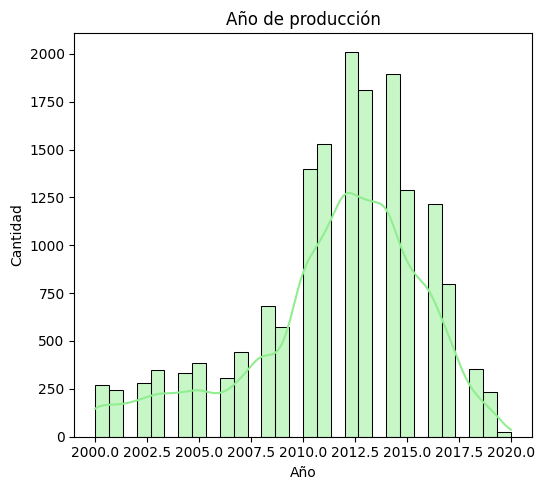

In [143]:
#Distribución de años de Producción
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_Car_sin_out['Prod. year'], kde=True, color='lightgreen', bins=30)
plt.title("Año de producción")
plt.xlabel("Año")
plt.ylabel("Cantidad")

plt.tight_layout()
plt.show()

En los datos del dataset, hay una distribución bastante normal en cuanto a los años de producción, aunque un poco sesgada hacia la izquierda, donde los datos se extienden un poco más hacía ese lado, porque decidimos dejar valores de autos producidos a partir del año 2000.

**Primer análisis de la distribución de la variable objetivo: "Precio del vehículo"**

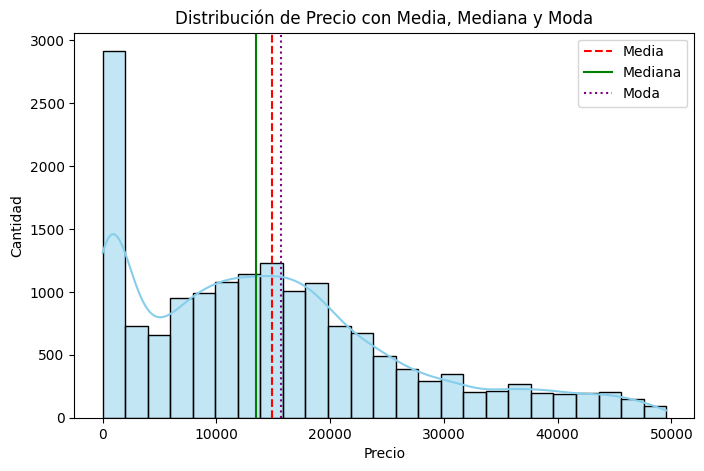

In [144]:
media_Age = df_Car_sin_out['Price'].mean()
mediana_Age = df_Car_sin_out['Price'].median()
moda_Age = df_Car_sin_out['Price'].mode()[0]

plt.figure(figsize=(8, 5))
sns.histplot(df_Car_sin_out['Price'], kde=True, color='skyblue', bins=25)
plt.axvline(media_Age, color='red', linestyle='--', label='Media')
plt.axvline(mediana_Age, color='green', linestyle='-', label='Mediana')
plt.axvline(moda_Age, color='purple', linestyle=':', label='Moda')
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.legend()
plt.title('Distribución de Precio con Media, Mediana y Moda')
plt.show()

In [145]:
Count_menos_1500 = df_Car_sin_out[df_Car_sin_out['Price'] < 1500].shape[0]

print(f"El número de autos con un valor menor a 1500 dólares es {Count_menos_1500}.")

El número de autos con un valor menor a 1500 dólares es 2631.


La variable precio tiene una distribución bastante similar a una distribución normal en su parte central (con un pequeño sesgo hacia uno de los lados), pero esto es solo si no consideramos los valores encontrados a la izquierda del gráfico. Estos son automóviles que tienen un precio muy bajo, donde quizás muchos de ellos tuvieron ese valor por tener algunos defectos o mal funcionamiento. El dataset no cuenta con información para poder saber cuáles deben ser considerados y cuáles no, y saber los motivos por que tantos vehículos fueron vendidos a esos precios. Se decide retirar los valores menores a 1500, para un mejor resultado en el análisis.

In [146]:
df_Car_sin_out_1500=df_Car_sin_out[df_Car_sin_out['Price'] > 1500]

In [147]:
df_Car_sin_out_1500.shape

(13780, 19)

**Análisis bivariado**

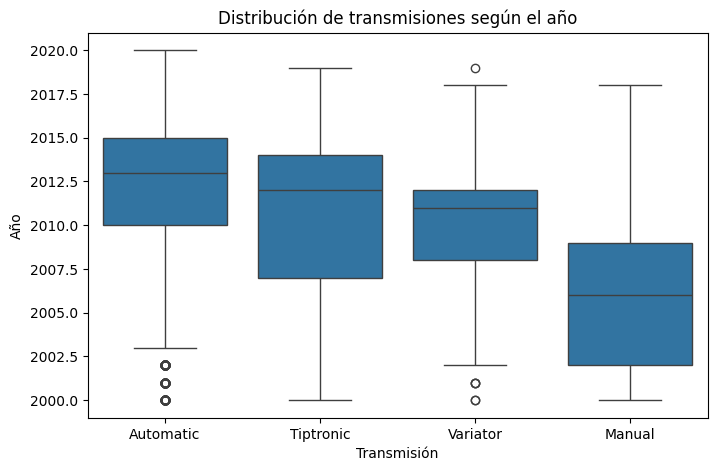

In [148]:
# Distribución de la transmisiones según el año de producción
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gear box type', y='Prod. year', data=df_Car_sin_out_1500)
plt.title('Distribución de transmisiones según el año')
plt.xlabel('Transmisión')
plt.ylabel('Año')
plt.show()

Claramente se ve como fueron variando la cantidad de autos que utilizaban las distintas transmisiones a lo largo de los años.  La transmisión manual, que era la tranmisión principal hace más de 20 años, claramente dejó de ser la más utilizada, pasando la mayoría de autos en paises como Estados Unidos a la transmisión automática. Este gráfico también nos permite ver, tanto para la transmisión Variator (continuamente variable), como para la Tiptronic (permite marcha automatica y manual, y es solo utilizada por marcas específicas de auto), los años en que fueron más utilizadas.

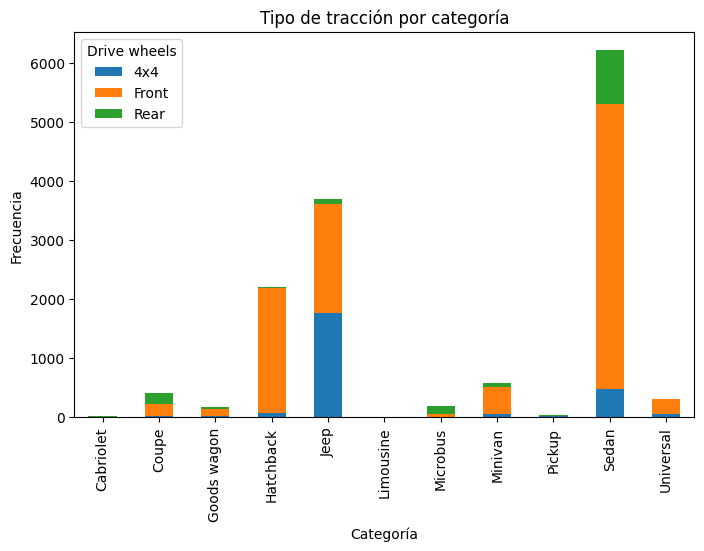

In [149]:
# Análisis del tipo de tracción por cada categoría
satisfaccion_genero = df_Car_sin_out_1500.groupby(['Category', 'Drive wheels']).size().unstack()
satisfaccion_genero.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Tipo de tracción por categoría')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

La tracción con más frecuencia en casi todas las categorías es la tracción frontal. Por su parte, la tracción trasera, solo se ve en gran porcentaje en las Coupes y en los Microbus. Por último, la tracción 4X4 solo está presente en un porcentaje importante en las categorias Jeep (especialmente), Hatchback y Sedan. En los Vehículos Jeep, son aproximadamente la mitad los que tienen este tipo de tracción. Si bien en Sedan la principal tracción es la frontal, puede verse que la tracción trasera y la 4x4 tienen un porcentaje

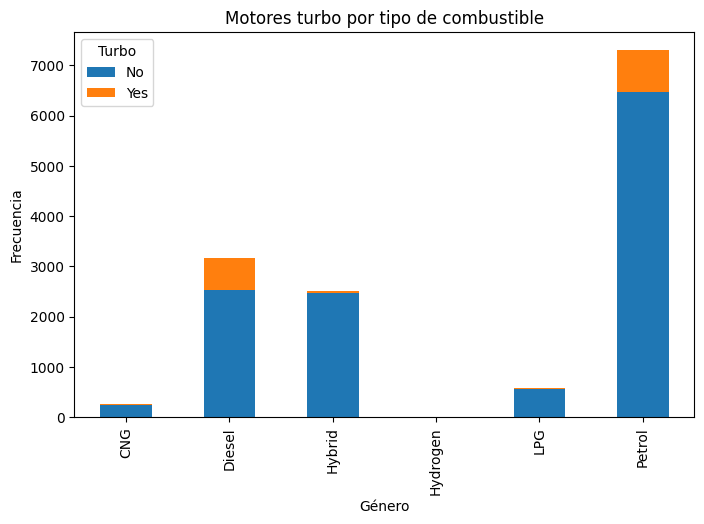

In [150]:
# Analisis de autos con motor turbo
satisfaccion_genero = df_Car_sin_out_1500.groupby(['Fuel type', 'Turbo']).size().unstack()
satisfaccion_genero.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Motores turbo por tipo de combustible')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

Los motores turbo se encuentras solamente (y en un porcentaje no muy alto) en vehículos con combustible naftero o diesel.

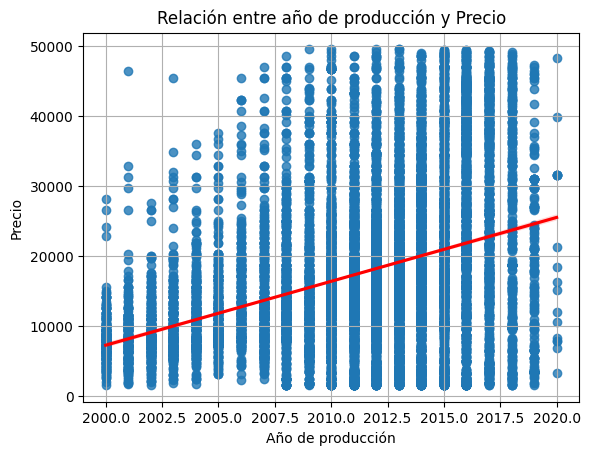

In [151]:
# Relación entre año de producción y precio con su línea de tendencia
sns.regplot(x='Prod. year', y='Price', data=df_Car_sin_out_1500, line_kws={'color': 'red'})
plt.title('Relación entre año de producción y Precio')
plt.xlabel('Año de producción')
plt.ylabel('Precio')
plt.grid()
plt.show()

Se puede observar una línea de tendencia o correlación positiva entre el año de producción y el precio, donde claramente se ve que los mayores precios tiene mayor cantidad de datos en los últimos años.

Se realizará matriz de correlación para obtener más datos de esta tendencia.

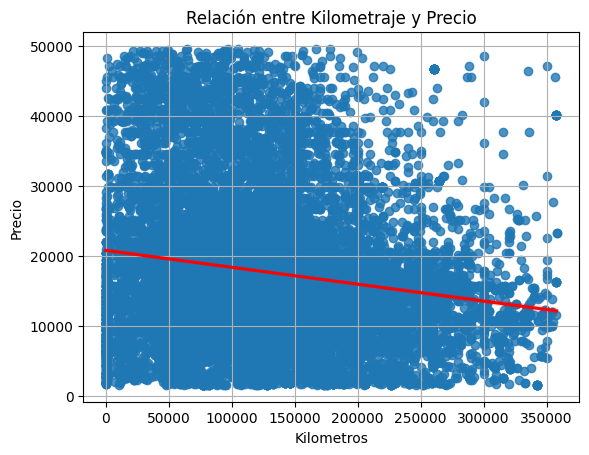

In [152]:
# Relación entre año los kilómetros recorridos y el precio con su línea de tendencia
sns.regplot(x='Mileage', y='Price', data=df_Car_sin_out_1500, line_kws={'color': 'red'})
plt.title('Relación entre Kilometraje y Precio')
plt.xlabel('Kilometros')
plt.ylabel('Precio')
plt.grid()
plt.show()

En este caso se puede observar una tendencia negativa entre los kilómetros y el precio, lo que también muestra que a medida que un vehículo tiene más kilometros ya no se observa en gran catidad entre los de mayor valor.

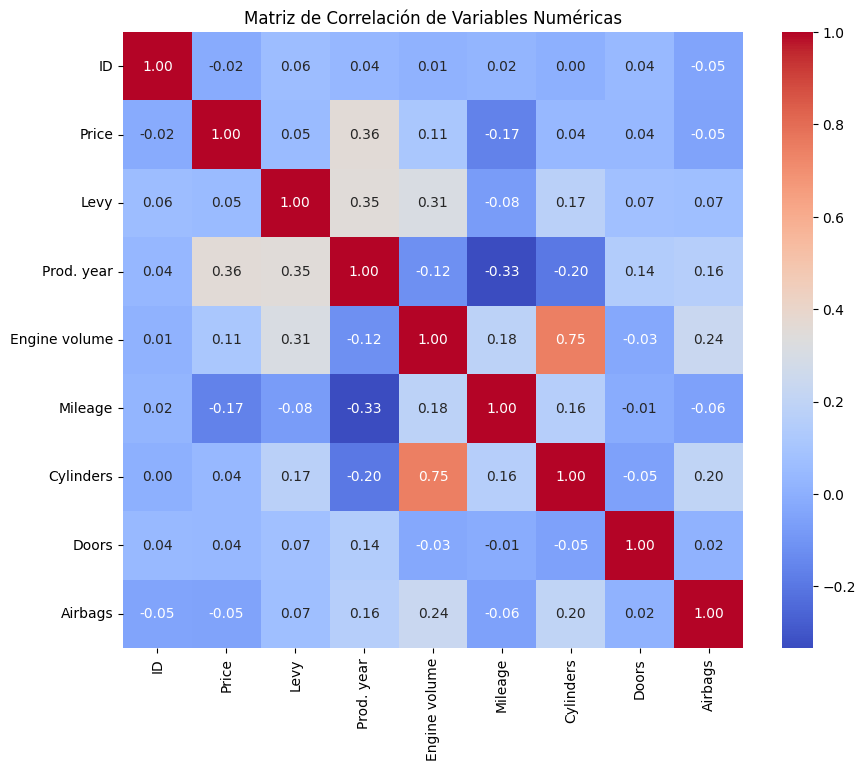

In [153]:
# Seleccionar solo las columnas numéricas
numeric_cols = df_Car_sin_out_1500.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
corr_matrix = df_Car_sin_out_1500[numeric_cols].corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

La única correlación alta que la matriz muestra es entre el número de cilindros y el volumen del motor. Al realizar el análisis de variables independientes sobre la variable objetivo, debemos tener en cuenta que no deberíamos utilizar ambas variables.

En cuanto a la correlación con la variable objetivo, claramente la más importante es la de año de producción como se había visto en el gráfico anterior, seguido por la variable de kilometraje (aunque en un valor más bajo). Se deberá agregar las variables categóricas para que ayuden al modelo si esperamos que este pueda tener resultados eficientes.

**Análisis multivariado**

/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


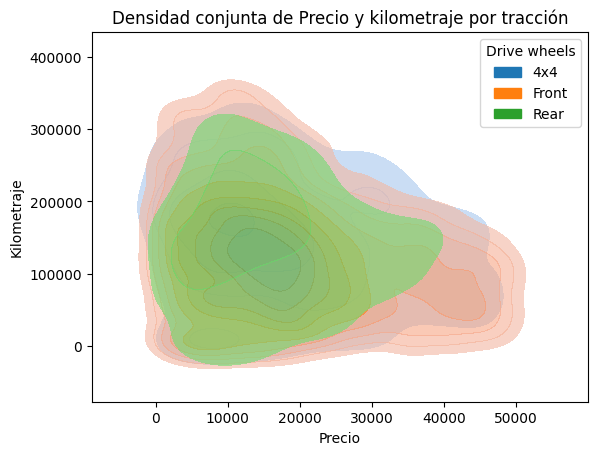

In [154]:
sns.kdeplot(data=df_Car_sin_out_1500, x='Price', y='Mileage', hue='Drive wheels', fill=True, cmap='coolwarm', alpha=0.6)
plt.title("Densidad conjunta de Precio y kilometraje por tracción")
plt.xlabel("Precio")
plt.ylabel("Kilometraje")
plt.show()

El grafico permite ver como a medida que sube el precio de los vehículos, el kilometraje que estos tienen recorrido es menor, viendo que en los valores más altos no hay densidad de datos en kilometraje mayor a 200 mil.  Al mismo tiempo, permite ver que no hay mucha diferencia en valores altos de kilometros por las distintas tracciones, todas llegan a valores similares con alguna variación en la densidad; en cambio, si se puede ver que la tracción trasera no tiene presencia en los precios más elevados, siendo estos la gran mayoría de tracción delantera o 4x4.

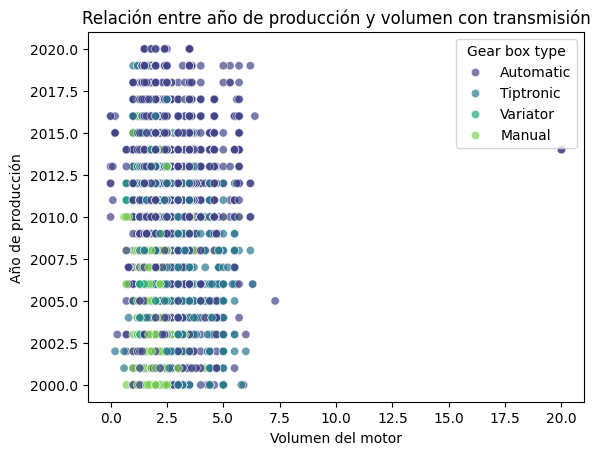

In [155]:
# Deseamos ver si se han producido cambios con el paso de los años, tanto en volumen del motor como en el tipo de caja.

sns.scatterplot(data=df_Car_sin_out_1500, x='Engine volume', y='Prod. year', hue='Gear box type', palette='viridis', alpha=0.7)
plt.title("Relación entre año de producción y volumen con transmisión")
plt.xlabel("Volumen del motor")
plt.ylabel("Año de producción")
plt.show()

Gracias a esta gráfica podemos ver la única diferencia entre los volumenes ofrecidos con el paso de los años es que en los más recientes se ven menos motores de gran volumen (mayor a 3) por el avance de la tecnología, que permitió que ya no sean necesarios. Pero si se vio claramente es que cada vez es menos ofrecido el tipo de transmisión manual. Parecería que los últimos años ha casi desaparecido por completo.

**Conclusiones del EDA**

El análisis exploratorio de datos nos permitió analizar tanto las variables independientes como las variables objetivo, para poder entender los datos y prepararlos para el modelo.

Gracias al analisis de variables, pudimos descubrir valores dentro de una variable que debías ser transformados o que eran similares (como autos híbridos) que era necesario unir o reemplazar. También pudimos descubrir el tipo de distribución de esas variables, y algunas relaciones que indican que con el paso de los años algunas tecnologías o tipos de vehículos cada vez están menos disponibles.

Necesitamos al mismo tiempo realizar la eliminación de duplicados y de outliers en ciertas variables númericas, y con esto se nos permitió conocer cuales de esas variables independientes eran más relevantes para la variable objetivo, como son los años de producción, y los kilómetros recorridos.



Como conclusión de este primer análisis podemos indicar que la correlación entre esas variables solo númericas no será suficiente para obtener un buen resultado en nuestro modelo. Ahora debemos trabajar con las variables categóricas, convirtiéndolas en numéricas, lo que nos permitirá incluirlas en el modelo y podremos avanzar en el proyecto para cumplir su objetivo.

# **Preprocesamiento de datos**

**Codificación de variables no numéricas**


Tal como se indicó en la conclusión, necesitamos codificar todas la variables no numéricas, para poder incluirlas en el modelo. Muchas de esas categorías será de vital importancia para poder obtener buenos resultados en el modelo.

In [156]:
df_cod=df_Car_sin_out_1500.copy()

In [157]:
df_cod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13780 entries, 0 to 19235
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                13780 non-null  int64  
 1   Price             13780 non-null  int64  
 2   Levy              13780 non-null  int64  
 3   Manufacturer      13780 non-null  object 
 4   Model             13780 non-null  object 
 5   Prod. year        13780 non-null  int64  
 6   Category          13780 non-null  object 
 7   Leather interior  13780 non-null  object 
 8   Fuel type         13780 non-null  object 
 9   Engine volume     13780 non-null  float64
 10  Mileage           13780 non-null  int64  
 11  Cylinders         13780 non-null  float64
 12  Gear box type     13780 non-null  object 
 13  Drive wheels      13780 non-null  object 
 14  Doors             13780 non-null  int64  
 15  Wheel             13780 non-null  object 
 16  Color             13780 non-null  object 
 17

In [158]:
df_cod.select_dtypes(include=['object']).apply(pd.unique)

,0
Manufacturer,"[LEXUS, CHEVROLET, HONDA, FORD, HYUNDAI, TOYOT..."
Model,"[RX 450, Equinox, FIT, Escape, Santa FE, Prius..."
Category,"[Jeep, Hatchback, Sedan, Microbus, Goods wagon..."
Leather interior,"[Yes, No]"
Fuel type,"[Hybrid, Petrol, Diesel, CNG, LPG, Hydrogen]"
Gear box type,"[Automatic, Tiptronic, Variator, Manual]"
Drive wheels,"[4x4, Front, Rear]"
Wheel,"[Left wheel, Right-hand drive]"
Color,"[Silver, Black, White, Blue, Grey, Sky blue, R..."
Turbo,"[No, Yes]"


In [159]:
df_cod.describe(include=['object']).T

,count,unique,top,freq
Manufacturer,13780,56,HYUNDAI,2960
Model,13780,1325,Elantra,809
Category,13780,11,Sedan,6211
Leather interior,13780,2,Yes,9722
Fuel type,13780,6,Petrol,7295
Gear box type,13780,4,Automatic,9445
Drive wheels,13780,3,Front,9897
Wheel,13780,2,Left wheel,12571
Color,13780,16,Black,3456
Turbo,13780,2,No,12286


Comenzaremos con la codificación simple de las variables Turbo, Leather interior y Wheel, las cuales tienen dos opciones (Si o no, Derecha o Izquierda)

In [160]:
df_cod['Turbo'] = df_cod['Turbo'].map({'Yes': 1, 'No': 0})
df_cod['Leather interior'] = df_cod['Leather interior'].map({'Yes': 1, 'No': 0})
df_cod['Wheel'] = df_cod['Wheel'].map({'Left wheel': 1, 'Right-hand drive': 0})

Continuamos con la codificación de variables que tienen solo 3 o 4 categorias, que no agregará muchas columnas a nuestro dataset. La variable Fuel type solo tiene 3 categorías principales, por lo que las otras 3 categorías se analizarán como "Otros", por su poca influencia o cantidad de datos.

In [161]:
df_cod['Fuel type'] = df_cod['Fuel type'].replace(['CNG','LPG','Hydrogen'], 'Otros')

In [162]:
df_cat = pd.get_dummies(df_cod, columns=["Fuel type","Gear box type", "Drive wheels"],dtype=int)
#df_cat (dataset que ya tiene 3 variables categoricas que fueron codificadas) tienen los datos que utilizaremos para todos los modelos

In [163]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13780 entries, 0 to 19235
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       13780 non-null  int64  
 1   Price                    13780 non-null  int64  
 2   Levy                     13780 non-null  int64  
 3   Manufacturer             13780 non-null  object 
 4   Model                    13780 non-null  object 
 5   Prod. year               13780 non-null  int64  
 6   Category                 13780 non-null  object 
 7   Leather interior         13780 non-null  int64  
 8   Engine volume            13780 non-null  float64
 9   Mileage                  13780 non-null  int64  
 10  Cylinders                13780 non-null  float64
 11  Doors                    13780 non-null  int64  
 12  Wheel                    13780 non-null  int64  
 13  Color                    13780 non-null  object 
 14  Airbags                  13

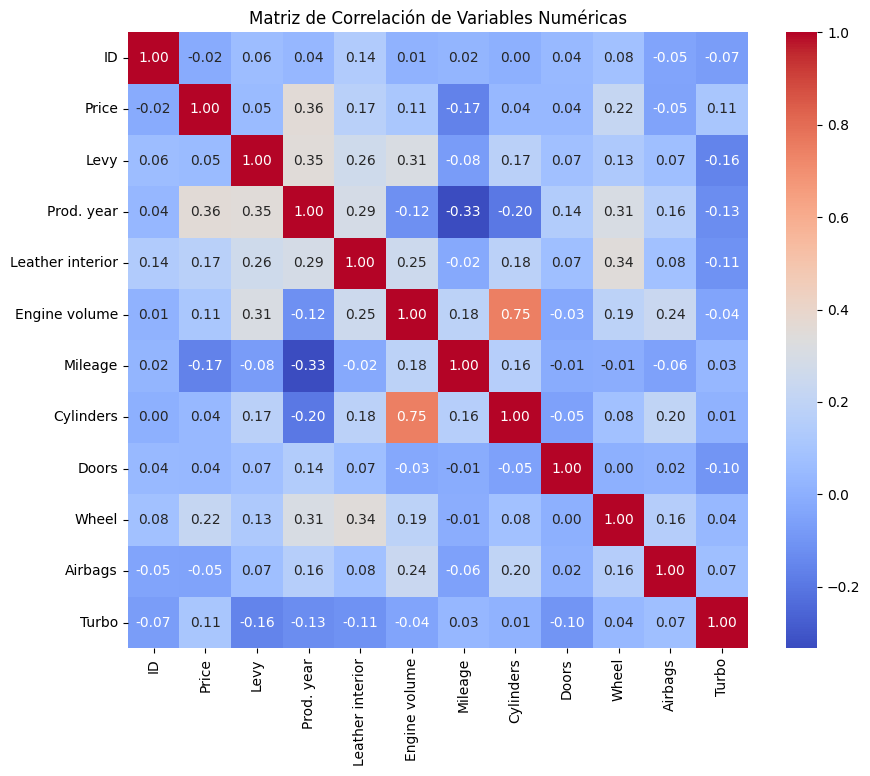

In [164]:
#Volvemos a realizar matriz de correlación para elegir las columnas que utilizaremos como básicas para todos los modelos
numeric_cols = df_cod.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df_cod[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

La matriz de correlación no incluye las variables categóricas que codificamos, pero si nos ayuda a saber que Cylinders y Doors son las dos variables que menos influencia tienen sobre el precio de los vehículos

#**Sección de variables (Feature Selection)**

Eliminamos las variables que finalmente no utilizaremos en nuestros modelos por su poca o nula relevación con nuestra variable objetivo

In [165]:
#Se eliminan variables que se decide no utilizar en ningún modelo: ID, Color
df_cat=df_cat.copy().drop(['ID','Color'], axis=1)

#Se eliminan algunas variables numéricas con poca correlación con la variable precio
df_cat=df_cat.drop(['Cylinders','Doors'], axis=1)

Como parte del proceso de feature selection, también nos interesa analizar si alguna de las variables que fueron codificadas tiene bajo impacto en nuestra variable objetivo. Esto lo tendremos que hacer luego del primero modelo, para poder ver los resultados. Analizaremos si Fuel type, Gear box Type o Drive wheels podrían ser quitadas del análisis por su bajo impacto.

#**Modelos de regresión**

In [166]:
#Importamos librerías necesarias para poder realizar los modelos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostRegressor

**Primer modelo**

Se comenzará con un primer modelo que incluye las variables numéricas y aquellas que ya se realizó su codificación.  Se dejarán afuera de este modelo las variables Manufacturer, Model y Category para luego ser agregadas en los distintos modelos y ver su influencia. Por último, se verá si podemos hacer alguna selección adicional de variables.

In [167]:
#Se eliminan variables aun no codificadas, que dejaremos para los siguientes modelos
df_1mod=df_cat.drop(['Manufacturer','Model','Category'], axis=1)

In [168]:
df_1mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13780 entries, 0 to 19235
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    13780 non-null  int64  
 1   Levy                     13780 non-null  int64  
 2   Prod. year               13780 non-null  int64  
 3   Leather interior         13780 non-null  int64  
 4   Engine volume            13780 non-null  float64
 5   Mileage                  13780 non-null  int64  
 6   Wheel                    13780 non-null  int64  
 7   Airbags                  13780 non-null  int64  
 8   Turbo                    13780 non-null  int64  
 9   Fuel type_Diesel         13780 non-null  int64  
 10  Fuel type_Hybrid         13780 non-null  int64  
 11  Fuel type_Otros          13780 non-null  int64  
 12  Fuel type_Petrol         13780 non-null  int64  
 13  Gear box type_Automatic  13780 non-null  int64  
 14  Gear box type_Manual     13

In [169]:
#Primer modelo de regresion lineal
df=df_1mod.copy()

In [170]:
#Dividimos las datos en x e y, para separar la variable objetivo
X = df.drop(['Price'], axis=1)
y = df['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar el modelo y entrenar
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

Error cuadrático medio (MSE): 81060155.87622775
Coeficiente de determinación (R^2): 0.32703856267978915


**Conclusión del primer modelo:**

Como suponíamos, al no incluir Marca y Categoría, probablemente dos de los datos más importantes, el modelo tiene un resultado muy bajo en R-cuadrado con un MSE alto.  En el próximo modelo buscaremos la mejor forma de incluir esos datos y ver cuánto impacto tienen en la predicción.

**Sección de variables - Variables categóricas**

Antes de realizar el segundo modelo, intentaremos saber si alguna de las variables previamente codificadas pueden ser eliminadas por no tener una gran influencia en el modelo. Vamos a comparar el resultado del primer modelo, con los resultados cuando no incluimos cada una de esas variables.

In [171]:
#Imprimimos los resultados previos, que incluyen las 3 variables, para poder comparar los resultados
print('Resultado primer modelo')
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')
print('----------------------')


df_sft=df.drop(['Fuel type_Diesel','Fuel type_Hybrid','Fuel type_Otros','Fuel type_Petrol'], axis=1)
X = df_sft.drop(['Price'], axis=1)
y = df_sft['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Resultado sin fuel type')
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')
print('----------------------')

df_sgbt=df.drop(['Gear box type_Automatic','Gear box type_Manual','Gear box type_Tiptronic','Gear box type_Variator'], axis=1)
X = df_sgbt.drop(['Price'], axis=1)
y = df_sgbt['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Resultado sin gear box type')
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')
print('----------------------')

df_sdw=df.drop(['Drive wheels_4x4','Drive wheels_Front','Drive wheels_Rear'], axis=1)
X = df_sdw.drop(['Price'], axis=1)
y = df_sdw['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Resultado sin drive wheels')
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

Resultado primer modelo
Error cuadrático medio (MSE): 81060155.87622775
Coeficiente de determinación (R^2): 0.32703856267978915
----------------------
Resultado sin fuel type
Error cuadrático medio (MSE): 88814083.42020778
Coeficiente de determinación (R^2): 0.2626654539870156
----------------------
Resultado sin gear box type
Error cuadrático medio (MSE): 84968115.11421221
Coeficiente de determinación (R^2): 0.29459468396583166
----------------------
Resultado sin drive wheels
Error cuadrático medio (MSE): 81105395.85609175
Coeficiente de determinación (R^2): 0.3266629803539902


Gracias a este análisis, podemos ver que el tipo de tracción (Drive Wheel) tendrá una influencia casi nula en nuestra variable objetivo, por lo que podemos eliminarla del dataset. Sin ella, el resultado fue casi el mismo que cuando la incluimos. En cambio, hay una variación en los resultados si quitamos el tipo de combustible (fuel type) o tipo de caja de cambio o transmisión (Gear box type), por los que las consideramos categorías importantes para los modelos y las mantendremos en nuestro análisis.

In [172]:
#Se elimina la variables codificada Drive wheels para todos los modelos que realizaremos
df_cat=df_cat.drop(['Drive wheels_4x4','Drive wheels_Front','Drive wheels_Rear'], axis=1)

**Segundo modelo - Label_encoder**



En el segundo modelo intentaremos incluir las 3 variables que consideramos importantes, Manufacturer, Model y Category, tratando de utilizar LabelEncoder para no agregar columnas al modelo. Intentaremos ver si el modelo puede reconocer que son categorias, logrando que no interprete que estos tienen un orden o valor.

In [173]:
df_2mod=df_cat.copy()
label_encoder_Manufacturer = LabelEncoder()
label_encoder_Model = LabelEncoder()
label_encoder_Category = LabelEncoder()
df_2mod['Manufacturer_cod'] = label_encoder_Manufacturer.fit_transform(df_2mod['Manufacturer'])
df_2mod['Model_cod'] = label_encoder_Model.fit_transform(df_2mod['Model'])
df_2mod['Category_cod'] = label_encoder_Model.fit_transform(df_2mod['Category'])

In [174]:
df_2mod=df_2mod.drop(['Manufacturer','Model','Category'], axis=1)

In [175]:
df_2mod.head()

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Wheel,Airbags,Turbo,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Otros,Fuel type_Petrol,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Manufacturer_cod,Model_cod,Category_cod
0,13328,1399,2010,1,3.50,186005,1,12,0,0,1,0,0,1,0,0,0,28,1047,4
1,16621,1018,2011,0,3.00,192000,1,8,0,0,0,0,1,0,0,1,0,6,548,4
2,8467,0,2006,0,1.30,200000,0,2,0,0,0,0,1,0,0,0,1,18,569,3
3,3607,862,2011,1,2.50,168966,1,0,0,0,1,0,0,1,0,0,0,13,551,4
4,11726,446,2014,1,1.30,91901,1,4,0,0,0,0,1,1,0,0,0,18,569,3


In [176]:
df=df_2mod.copy()

In [177]:
X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

Error cuadrático medio (MSE): 79614261.3227499
Coeficiente de determinación (R^2): 0.3390423796772256


Si bien este segundo modelo tiene una muy pequeña mejora con respecto al modelo anterior, utilizar labelencoder para las 3 variables agregadas no dio el resultado esperado. Es muy posible que considere que en ellas los números tienen un valor o orden.
Necesitaremos buscar otras maneras en las cuales ver si podemos incluir en el modelo estas variables categóricas.

**Tercer modelo**

Para nuestro tercer modelo intentaremos agregar Manufacturer y Category con get_dummies, lo que creará una nueva columna por cada categoría, sabiendo que esto hará que el modelo tenga muchas variables, pero esperando que mejore los resultados

In [178]:
df_3mod=df_cat.copy()
#Codificamos las variables Manufacturer y Category
df_3mod = pd.get_dummies(df_3mod, columns=["Manufacturer", "Category"],dtype=int)
#Eliminamos Model porque no será utilizado en este tercer modelo
df_3mod=df_3mod.drop(['Model'], axis=1)

In [179]:
df_3mod.shape

(13780, 84)

In [180]:
df_3mod.head()

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Wheel,Airbags,Turbo,Fuel type_Diesel,...,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,13328,1399,2010,1,3.50,186005,1,12,0,0,...,0,0,0,1,0,0,0,0,0,0
1,16621,1018,2011,0,3.00,192000,1,8,0,0,...,0,0,0,1,0,0,0,0,0,0
2,8467,0,2006,0,1.30,200000,0,2,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3607,862,2011,1,2.50,168966,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,11726,446,2014,1,1.30,91901,1,4,0,0,...,0,0,1,0,0,0,0,0,0,0


In [181]:
df=df_3mod.copy()

In [182]:
X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

Error cuadrático medio (MSE): 67927188.34411106
Coeficiente de determinación (R^2): 0.4360684628959667


Teniendo un dataset con 87 columnas, que incluye una columna por cada categoría en lo que sería la marca y la categoría del auto, logramos mejorar los resultados del modelo en R-cuadrado, y apenas en MSE, pero haciendo que nuestro dataset sea complejo. Si bien es el mejor resultado hasta el momento, es necesario seguir buscando un mejor modelo a utilizar.

**Cuarto modelo**

Para el cuarto modelo, agregaremos también la columna Model (que tiene más de 1000 valores distintos) y utilizamos nuevamente la herramienta get_dummies, lo que sabermos que nos generará un modelo con una cantidad mucho mayor de columnas. En un segundo paso de este cuarto modelo, utilizaremos PCA (estandarizando los datos previamente) para reducir la dimensionalidad del dataset, porque no queremos dejar un modelo con más de 1000 variables, pero queremos ver si logramos un buen resultado que nos permita incluir la variable modelo de vehículo.

In [183]:
df_4mod=df_cat.copy()
df_4mod = pd.get_dummies(df_4mod, columns=["Manufacturer","Model", "Category"],dtype=int)
df=df_4mod.copy()

In [184]:
df.shape

(13780, 1409)

In [185]:
X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

Error cuadrático medio (MSE): 61399181.28477046
Coeficiente de determinación (R^2): 0.49026397937385546


In [186]:
# Estandarizar los datos
numeric = ['Levy', 'Prod. year', 'Engine volume','Mileage', 'Airbags']
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric] = scaler.fit_transform(X_train[numeric])
X_test_scaled[numeric] = scaler.transform(X_test[numeric])

In [187]:
# Aplicar PCA para reducir dimensiones a 12 componentes principales
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_train_pca

array([[ 2.19702946, -0.7948049 ,  1.50352947, ..., -0.21569377,
         0.23224446, -0.24418804],
       [-0.3280042 , -0.57409333, -0.45953214, ..., -0.41214334,
         0.38306374,  0.12676482],
       [ 1.13127065,  0.0022669 ,  1.3094783 , ...,  0.24497012,
         0.51052783,  0.25017225],
       ...,
       [ 0.69517796, -0.90694917,  1.39284417, ..., -0.89980017,
         0.07432852,  0.22223772],
       [ 0.79207367, -0.74011224,  1.52621912, ...,  0.10388678,
         0.60551262,  0.02715128],
       [-0.04191215, -0.14826958, -0.90744648, ...,  0.58374369,
        -0.12808857,  0.17985981]])

In [188]:
# Instanciar el modelo y entrenar
model = LinearRegression()
model.fit(X_train_pca, y_train)

LinearRegression()

In [189]:
# Realizar predicción con PCA
y_pred = model.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

Error cuadrático medio (MSE): 76652966.57095635
Coeficiente de determinación (R^2): 0.3636270495554662


Al agregar todas las categorías de la variable Model y quedarnos con un dataset de 1400 columnas, claramente se ve una mejora en el resultado del modelo, llegando a 0,49 de R^2. Sin embargo, sabiendo que debemos reducir la dimensionalidad, se intentó estandarizar los datos numéricos y aplicar PCA para la reducción, y el resultado, si bien es bueno, es menor al modelo anterior donde no considerabamos la variable Model. Necesitaríamos que la reducción del modelo sea más componentes para poder obtener mejores resultados.

**Quinto modelo**

En este último modelo se intentará utilizar solo aquellas marcas (Manufacturer) y categorías (Category) que más veces aparecen en el dataset, utilizando el top 12 de marcas y el top 5 en categorías, y utilizando "otros" para el resto de los datos. Luego se realizará la codificación de estas  con get_dummies, esperando que podamos obtener resultados similares a los del tercer modelo, solo habíendo perdido un pequeño porcentaje por la reducción de las variables restantes.

In [208]:
df_5mod=df_cat.copy()

In [209]:
#Obtenemos las 12 marcas con más cantidad
top_12_manufacturers = df_5mod['Manufacturer'].value_counts().nlargest(12).index
top_12_manufacturers

Index(['HYUNDAI', 'TOYOTA', 'MERCEDES-BENZ', 'CHEVROLET', 'FORD', 'BMW',
       'HONDA', 'NISSAN', 'LEXUS', 'VOLKSWAGEN', 'SSANGYONG', 'KIA'],
      dtype='object', name='Manufacturer')

In [210]:
#Reemplazamos todas las demás marcas con 'Otros' utilizando numpy
df_5mod['Manufacturer'] = np.where(df_5mod['Manufacturer'].isin(top_12_manufacturers), df_5mod['Manufacturer'], 'Otros')
df_5mod.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Engine volume,Mileage,Wheel,Airbags,Turbo,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Otros,Fuel type_Petrol,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator
0,13328,1399,LEXUS,RX 450,2010,Jeep,1,3.50,186005,1,12,0,0,1,0,0,1,0,0,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,3.00,192000,1,8,0,0,0,0,1,0,0,1,0
2,8467,0,HONDA,FIT,2006,Hatchback,0,1.30,200000,0,2,0,0,0,0,1,0,0,0,1
3,3607,862,FORD,Escape,2011,Jeep,1,2.50,168966,1,0,0,0,1,0,0,1,0,0,0
4,11726,446,HONDA,FIT,2014,Hatchback,1,1.30,91901,1,4,0,0,0,0,1,1,0,0,0


In [211]:
top_5_Category = df_5mod['Category'].value_counts().nlargest(5).index
top_5_Category

Index(['Sedan', 'Jeep', 'Hatchback', 'Minivan', 'Coupe'], dtype='object', name='Category')

In [212]:
#Reemplazamos todas las demás categorías (Category) con 'Otros'
df_5mod['Category'] = np.where(df_5mod['Category'].isin(top_5_Category), df_5mod['Category'], 'Otros')
df_5mod.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Engine volume,Mileage,Wheel,Airbags,Turbo,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Otros,Fuel type_Petrol,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator
0,13328,1399,LEXUS,RX 450,2010,Jeep,1,3.50,186005,1,12,0,0,1,0,0,1,0,0,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,3.00,192000,1,8,0,0,0,0,1,0,0,1,0
2,8467,0,HONDA,FIT,2006,Hatchback,0,1.30,200000,0,2,0,0,0,0,1,0,0,0,1
3,3607,862,FORD,Escape,2011,Jeep,1,2.50,168966,1,0,0,0,1,0,0,1,0,0,0
4,11726,446,HONDA,FIT,2014,Hatchback,1,1.30,91901,1,4,0,0,0,0,1,1,0,0,0


In [213]:
#Se realiza la codificación de las variables nuevamente (ahora con menos categorías)
df_5mod = pd.get_dummies(df_5mod, columns=["Manufacturer", "Category"],dtype=int)
df_5mod=df_5mod.drop(['Model'], axis=1)
df_5mod.shape

(13780, 36)

In [214]:
df=df_5mod.copy()
X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

Error cuadrático medio (MSE): 69169001.59634474
Coeficiente de determinación (R^2): 0.4257589289199588


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13780 entries, 0 to 19235
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       13780 non-null  int64  
 1   Levy                        13780 non-null  int64  
 2   Prod. year                  13780 non-null  int64  
 3   Leather interior            13780 non-null  int64  
 4   Engine volume               13780 non-null  float64
 5   Mileage                     13780 non-null  int64  
 6   Wheel                       13780 non-null  int64  
 7   Airbags                     13780 non-null  int64  
 8   Turbo                       13780 non-null  int64  
 9   Fuel type_Diesel            13780 non-null  int64  
 10  Fuel type_Hybrid            13780 non-null  int64  
 11  Fuel type_Otros             13780 non-null  int64  
 12  Fuel type_Petrol            13780 non-null  int64  
 13  Gear box type_Automatic     13780 no

El quinto modelo fue muy bueno, ya que logramos un resultado muy similar al tercer modelo, pero en este caso con una dimensionalidad mucho menor, con casi 50 columnas menos.

Habiendo analizado y encontrado las variables más importantes (12 en total), y logrado reducir en una buena cantidad la dimensionalidad de los datos, se utilizarán estos mismos conjuntos de entrenamiento y prueba (x e y) para intentar obtener mejores resultados con otros modelos de regresión más allá del lineal que ya utilizamos. Se necesita mejorar el R^2 y lograr que el MSE sea menor.

Las 12 variables que son importantes para el modelo son:

Levy, Prod. year, Leather interior, Engine volume, Mileage, Wheel, Airbags, Turbo, Fuel Type, Gear box type, Manufacturer y Category

**Otros modelos de regresión:**

In [219]:
# Primero utilizamos el modelo de árbol de decisión
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [220]:
y_pred_tree = decision_tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecisionTreeRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_tree}")
print(f"Coeficiente de Determinación (R^2): {r2_tree}")


DecisionTreeRegressor:
Error Cuadrático Medio (MSE): 47003461.05159776
Coeficiente de Determinación (R^2): 0.609777252876166


Ya con el modelo de árbol de decisión, se ve una mejora de los resultados.  Intentemos con otros modelos

In [221]:
# Ahora intentaremos el modelo Bagging con Regresión
bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_regressor.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)

In [223]:
y_pred = bagging_regressor.predict(X_test)
print("\nBagging_regressor:")
print(f"Error Cuadrático Medio (MSE):", mean_squared_error(y_test, y_pred))
print("R2 score del modelo Bagging:", r2_score(y_test, y_pred))



Bagging_regressor:
Error Cuadrático Medio (MSE): 29551436.76542453
R2 score del modelo Bagging: 0.7546639635025719


Aquí podemos ver una gran mejora tanto en R cuadrado como en el MSE, gracias al modelo de bagging.

In [226]:
# Tercero, el modelo AdaBoost Regresor
adaboost_regressor = AdaBoostRegressor(n_estimators=50)
adaboost_regressor.fit(X_train, y_train)

AdaBoostRegressor()

In [227]:
y_pred = adaboost_regressor.predict(X_test)
print(f"Error Cuadrático Medio (MSE):", mean_squared_error(y_test, y_pred))
print("R2 score del modelo:", r2_score(y_test, y_pred))

Error Cuadrático Medio (MSE): 80288419.77113892
R2 score del modelo: 0.33344551604545347


Adaboost regressor no da buenos resultados, teniendo un R cuadrado menor al de regresión lineal.

In [228]:
# Por último, el modelo de bosque aleatorio
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [229]:
y_pred_forest = random_forest.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("\RandomForestRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_forest}")
print(f"Coeficiente de Determinación (R^2): {r2_forest}")

\RandomForestRegressor:
Error Cuadrático Medio (MSE): 27294626.95343537
Coeficiente de Determinación (R^2): 0.773399999208617


El modelo de regresión Random forest fue el que mejor resultado nos dio, con un R^2 aproximado de 0,7734. Además logramos bajar en gran cantidad el error cuadrático medio (MSE), aunque todavía parece un poco alto y deberíamos seguir buscando maneras de mejorarlo.

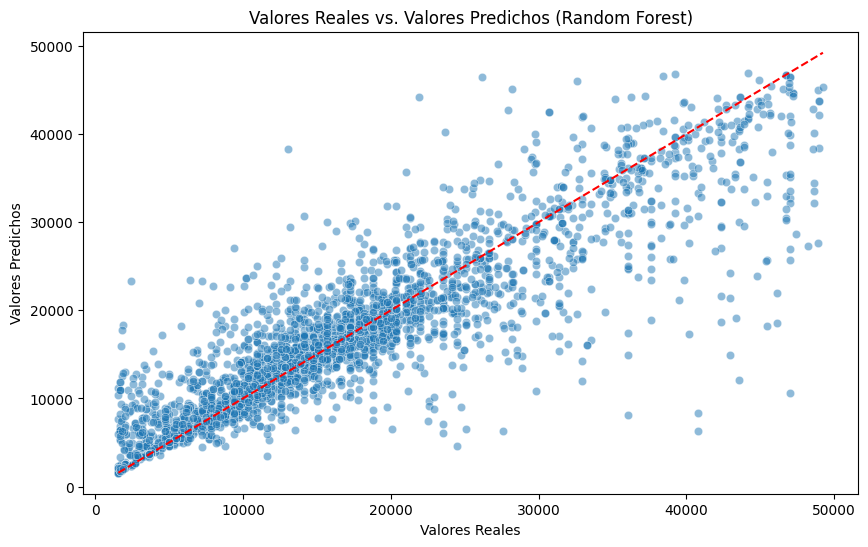

In [207]:
# Gráfico de dispersión de valores reales vs. valores predichos en el mejor modelo obtenido
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_forest, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos (Random Forest)')
plt.show()

#**Optimización de modelos**

Intentaremos ver si la optimización del modelo de regresión nos permite mejorar aun más el resultado. Debido a que nuestro modelo tiene un número considerable de variables, acotaremos los hiperparámetros a número de árboles (n_estimators) y profundidad (max_depth), sabiendo que luego se podrían agregar otro parámetros que podrían también ayudarnos.

In [205]:
#Realizar esta busqueda de parametros lleva algunos minutos debido a los datos analizados
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
accuracy = best_rf.score(X_test, y_test)
print("Precisión en el conjunto de prueba:", accuracy)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mejores hiperparámetros: {'max_depth': 20, 'n_estimators': 300}
Precisión en el conjunto de prueba: 0.7776589948820034


Se logró una pequeña mejora en el modelo gracias a los hiperparámetros. Se indica qué, para este modelo, se deben utilizar los siguientes parámetros:

- Número de árboles=300
- Profundidad=20

**Mejor resultado de R^2^: 0.7776589948820034**

Tal como se indica previamente, luego se podrían agregar otros hiperparámetros como min_samples_split, min_samples_leaf y max_features, buscando saber si el resultado podría incrementarse de una mejor manera.

# **Conclusiones Finales**

Una de las hipótesis a anailizar es si las marcas de los vehículos, por la confianza y conocimiento que se tiene sobre ellas, produce una variación en el precio aun en vehículos de similares características. Al mismo tiempo, si el año de fabricación, el kilometraje recorrido y el tipo de combustible utilizado actualmente son vistos como algunos de los determinantes en el precio.

Por medio de este modelo nos gustaría saber: ¿Son estas variables algunas de las más importantes? ¿Podemos predecir el valor de un vehículo sin incluir alguna de ellas? ¿Cuántas variables se requieren para poder tener un buen porcentaje de predicción en nuestro modelo? ¿Cuáles son otras variables necesarias? Por último, ¿puede un modelo predecir el precio de un vehículo con la información que este archivo provee o se requiere más información?

En este proyecto hemos trabajado paso a paso para responder a muchas de las preguntas que planteamos como objetivos, comenzando con la preparación de los datos, luego con el análisis exploratorio y, por último, con la busqueda de un buen modelo que nos permita predecir el precio del vehículo.

Conclusiones:

1.   La marca del automovil es de vital importancia para el modelo. Tal como indicabamos en nuestra hipótesis, la marca puede variar el precio aún si lo comparamos con otros modelos de similares características.
2.   Se comprobó que el kilometraje y el año del vehículo son las variables numéricas con más relación en el precio. También pudimos demostrar luego del primer modelo de regresión lineal que el tipo de combustible afecta en el precio, y al no incluir esa información, el modelo se ve afectado.
3.   Se decidió dejar a 12 variables como las más importantes para el modelo, porque quitando alguna de ellas, los resultados se veían afectados. Sin embargo, claramentos las 4 variables independientes principales son las que fueron planteadas en la hipótesis, y será muy difícil hacer una buena predicción sin alguna de ellas, el error será mucho mayor.
4.   Finalmente, se logró el objetivo de poder encontrar un modelo aceptable, para lo cual fue necesario utilizar no solo distintos modelos de regresión, sino también algunos hiperparámetros. Las variables provistas por este dataset son suficientes para una buena predicción, pero claramente otros datos como es el estado del vehículo podría mejorarlo (había muchos automóviles a un precio muy bajo que podían verse afectados por otros factores).

Siguientes pasos:

1.   Intentando mejorar el modelo, se podrían utilizar otros modelos de regresión o de ensamble.
2.   Utilizar otros hiperparámetros que podrían llegar a mejorar el resultado con los datos actuales.
3.   Como un segundo paso para proyecto, se podría buscar obtener un dataset que incluya una variable "Estado del vehículo", con algunos niveles, que permitiría mejorar los resultados en un gran porcentaje.
4.   Por último, si se cuenta con los datos suficientes en las marcas principales, se podría intentar hacer un análisis individual, permitiendo incluir los modelos de cada una.

